# Descriptive statistics with Python

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jillxoreilly/StatsCourse/blob/main/Car%20Parking%20Exercise%201.ipynb#)

## Car park exercise

In this exercise, you will plan car parking at a ferry terminal and inside the ferry itself. 

You will be given data about the lengths of vehicles in a <tt>.csv</tt> file. By plotting the data and calculating descriptive statististics, you will produce a short report recommending the size and number of parking spots required.

<div style = "    padding-top: 10px;
    padding-bottom: 10px;
    padding-left: 10px;
    padding-right: 10px;
    box-shadow: 0px 8px 16px 0px rgba(0,0,0,0.2);
    vertical-align: middle;">
    
<h2>The brief:</h2> 

The SpeedyFerry Company are planning a new terminal. Vehicles will arrive at the terminal in advance of their sailing time and be parked in a car park to await boarding.

SpeedyFerry would like to know how to mark out the car park. They want to fit as many parking spaces into their land as possible, whilst still making sure that the vehicles fit in the spaces
    <ul>
<li> How long and wide should the parking spots be?
<li> Should different vehicle types be separated in different sections of the car park?
<li> If so, what ratio of long vehicle places to short vehicle places is needed?
        </ul>
    
<b>Your task is to produce a report answering these questions, justifying you answer with plots and descriptive statistics based on the sample data provided by SpeedyFerry, introduced below</b>
</div>

<img src="images/carsBanner.png" width=100% alt="Picture of some cars" >

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()

### Load and view the data

To make our plan for car parking, we need some information about the vehicles to be accommodated.

SpeedyFerry have provided a data file with a complete list of the vehicles parked at a vehicle-ferry terminal at 1pm on Sunday 24th April 2022, which they regard as a representative sample.

Let's load the datafile "data/vehicles.csv" and have a look what information we have in the dataset

In [2]:
vehicles = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourse/main/data/vehicles.csv')
display(vehicles)

HTTPError: HTTP Error 404: Not Found

That was a long list of vehicles!

* What information do we have about each vehicle?

### Obtain descriptive statistics

We can use built in functions in <tt>pandas</tt> to return the mean, standard deviation and centiles (incluing the median and quartiles) of the data.

Let's get some descriptives for the length of vehicles:

In [4]:
# the mean length
vehicles['length'].mean()

6.722971847507332

In [5]:
# the median length
vehicles['length'].median()

4.4193

In [9]:
# the median, which is the 50th centile of 0.5 quantile
vehicles['length'].quantile(0.5)

4.4193

In [10]:
# The inter quartile range, which is the difference between the 25th and 75th centile or the 0,25 and 0,75 quantile
vehicles['length'].quantile(0.75)-vehicles['length'].quantile(0.25)

5.330875

We can make life easier by using the function <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html"><tt>pandas.describe()</tt></a>, which spits out all the most commonly used descriptive statistics:

In [12]:
vehicles['length'].describe()

count    1364.000000
mean        6.722972
std         4.232075
min         3.110900
25%         3.929450
50%         4.419300
75%         9.260325
max        16.231000
Name: length, dtype: float64

Indeed, we don't need to limit ourselves to length - 
we can get descriptives for all numeric columns in the dataframe at once

In [14]:
vehicles.describe()

,length,height,width
count,1364.000000,1364.000000,1364.000000
mean,6.722972,2.234867,1.981283
std,4.232075,1.072685,0.309353
min,3.110900,1.430400,1.624100
25%,3.929450,1.553600,1.771800
50%,4.419300,1.601250,1.812950
75%,9.260325,2.911750,2.254650
max,16.231000,4.213700,2.546700


## Grouping data

You can see above that the mean length of vehicles in the car park is 6.72m.

This is surprising as it is rather longer than even a large family car

To get a better sense of the length data, I am going to plot them. 

Don't worry too much about the plotting code for now, as there are dedicated exercises on plotting later.

Text(0.5, 0, 'vehicle length (m)')

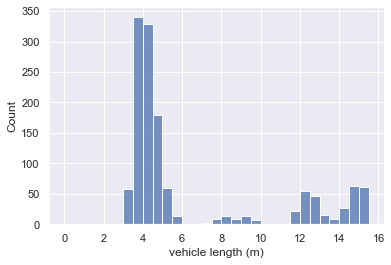

In [31]:
sns.histplot(data=vehicles, x="length",  bins = np.arange(0,16,0.5))
plt.xlabel('vehicle length (m)')

Interesting. It looks like there are several clusters of vehicle lengths. 

Have a look back at our dataframe - is there some information there that could explain the different clusters?
<ul>
    <li> Probably the clusters relate to different vehicle types
</ul>

I can plot vehicle types in different colours (again no need ot worry about the plotting code at this stage)

Text(0.5, 0, 'vehicle length (m)')

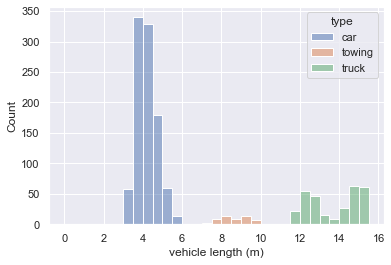

In [30]:
sns.histplot(data=vehicles, x="length", bins = np.arange(0,16,0.5), hue="type")
plt.xlabel('vehicle length (m)')

Aha. We might want to describe our data separately for each by vehicle type.

One way to do this is to create separate dataframes for each vehicle type:

In [37]:
cars = vehicles[vehicles['type']=='car']
cars.describe()

,length,height,width
count,981.000000,981.000000,981.000000
mean,4.197994,1.580810,1.791925
std,0.517761,0.059263,0.046921
min,3.110900,1.430400,1.624100
25%,3.815400,1.540000,1.760200
50%,4.121600,1.574500,1.790400
75%,4.518400,1.611900,1.820900
max,6.102400,1.899300,1.958000


we can see that 981 of the vehicles were cars, and their mean length was 4.198m, much shorter than the mean over all vehicles.

Try modifying the code below to get descriptive statistics for trucks:

In [38]:
# modify the code to get descritives for trucks
cars = vehicles[vehicles['type']=='car']
cars.describe()

,length,height,width
count,981.000000,981.000000,981.000000
mean,4.197994,1.580810,1.791925
std,0.517761,0.059263,0.046921
min,3.110900,1.430400,1.624100
25%,3.815400,1.540000,1.760200
50%,4.121600,1.574500,1.790400
75%,4.518400,1.611900,1.820900
max,6.102400,1.899300,1.958000


### <tt>pandas.groupby</tt>

We can also use the pandas function <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html"><tt>groupby</tt></a> to split up our dataframe according to a categorical variable, in this case vehicle type.

In [41]:
vehicles.groupby(['type']).describe()

length                                                           \
        count       mean       std      min      25%      50%      75%   
type                                                                     
car     981.0   4.197994  0.517761   3.1109   3.8154   4.1216   4.5184   
towing   53.0   8.672951  0.713460   7.2561   8.1323   8.6894   9.2191   
truck   330.0  13.915864  1.343028  11.1480  12.5640  14.3650  15.0750   

                height            ...                  width            \
            max  count      mean  ...     75%     max  count      mean   
type                              ...                                    
car      6.1024  981.0  1.580810  ...  1.6119  1.8993  981.0  1.791925   
towing  10.0980   53.0  2.897838  ...  2.9064  2.9445   53.0  2.248326   
truck   16.2310  330.0  4.072725  ...  4.2009  4.2137  330.0  2.501304   

                                                            
             std     min     25%      50%      75%     max  
type                                                        
car     0.046921  1.6241  1.7602  1.79040  1.82090  1.9580  
towing  0.008222  2.2292  2.2442  2.24790  2.25400  2.2642  
truck   0.015871  2.4629  2.4898  2.50145  2.51155  2.5467  

[3 rows x 24 columns]

Yikes, that was an unweildy table!

It may be preferable to output descriptives only for one measure (eg length):

In [43]:
vehicles.groupby(['type'])['length'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
car,981.0,4.197994,0.517761,3.1109,3.8154,4.1216,4.5184,6.1024
towing,53.0,8.672951,0.713460,7.2561,8.1323,8.6894,9.2191,10.0980
truck,330.0,13.915864,1.343028,11.1480,12.5640,14.3650,15.0750,16.2310


... or to output one descriptive (such as the mean) at a time, rather than the whole table

In [45]:
vehicles.groupby(['type']).mean()

,length,height,width
type,,,
car,4.197994,1.580810,1.791925
towing,8.672951,2.897838,2.248326
truck,13.915864,4.072725,2.501304


# Your report for SpeedyFerry

<div style = "    padding-top: 10px;
    padding-bottom: 10px;
    padding-left: 10px;
    padding-right: 10px;
    box-shadow: 0px 8px 16px 0px rgba(0,0,0,0.2);
    vertical-align: middle;">
    
This is a <tt>stub</tt> for your report to SpeedyFerry. 

The text in each markdown cell is given to guide you. You will replace this with your own text.

Similarly, you will edit the code in each code cell to produce the necessary plots and statistics.

This stub is quite structured to guide you through the process. Later in the course, you will develop your reports with less structured guidance.
    
</div>

## Description of vehicle types and sizes

Based on the sample data recorded at 1pm on Sunday 24th April 2022, the vehicles to be accommodated fall into XXX categories:
* cars
* xxx
* xxx

The majority of vehicles are cars.

In [49]:
# load the data
vehicles = ### your code here to load the csv file

# produce a plot that illustrates that the majority of vehicles are cars
sns.histplot(data=vehicles, x="length", bins = np.arange(0,16,0.5), hue="type")
plt.xlabel('vehicle length (m)')

SyntaxError: invalid syntax (3738470278.py, line 2)

The length and width of vehicles differs substantially between classes

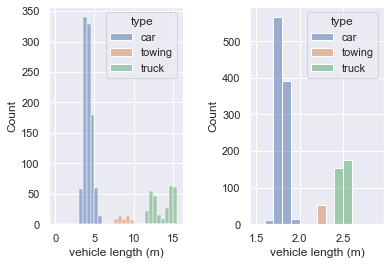

In [55]:
# produce a plot to illustrate the distribution of lengths and widths for each class
plt.subplot(1,2,1)
sns.histplot(data=vehicles, x="length", bins = np.arange(0,16,0.5), hue="type")
plt.xlabel('vehicle length (m)')

plt.subplot(1,2,2)
sns.histplot(data=vehicles, x="width", bins = np.arange(1.5,3,0.1), hue="type")
plt.xlabel('vehicle length (m)')

plt.subplots_adjust(wspace = 0.5) # shift the plots sideways so they don't overlap

The mean length of cars is 4.20m (sd 0.51), the mean length of trucks \< your text here \> and tows \< your text here \>. 

In [ ]:
# Your code here to output the mean and s.d. of length for each class

The mean width of cars is \< your text here giving descriptives for width of each class \> 

In [ ]:
# Your code here to output the mean and s.d. of width for each class

therefore we would recommend .....[your comment on how to segregate the parking areas for vehicle classes]......:

## Size and number of parking spaces in each zone

We recommend that the parking spaces in each zone should be sized to fit the 95th centile in length and width of each vehicle class. 
The exact lengths are: /<your text here/>

In [78]:
# edit this code to give the 95th percentile (0.95 quantile) of measurements for each vehicle type
#

vehicles.groupby(['type']).q# complete the line!......


,length,height,width
type,,,
car,4.61130,1.62480,1.83000
towing,9.27982,2.91196,2.25472
truck,15.21260,4.20212,2.51552


Given the observed frequencies in each vehicle class, we recommend the following minimum number of spaces in each zone, which is our observed vehicle counts +10% /< your text here - />

In [79]:
# your code to give the number of vehicles in each class - 
# hint - similar to the code above but use .count() instead of .quantile()

,length,height,width
type,,,
car,981,981,981
towing,53,53,53
truck,330,330,330


### The end!

In [94]:
cars = vehicles[vehicles['type']=='car']

cars.to_csv('data/cars.csv', index="False")
vehicles.to_csv('data/vehicles.csv', index="False")